# Problem Set 4: Networks

### Mapping Social Activism Groups in Pennsylvania

In this problem set we are going to be working with social data to visualize a network of activism groups. The data is provided by the DUSP CoLab Mapping Resistance project, and contains 41 grassroots social activism and civic justice groups in Pennsylvania. The dataset we provide contains the number of Twitter followers for each of the groups, along with a list of ids of each follower. Our goal is to get a better picture of the social connectivity of these groups, and figure out which of the groups share Twitter followers, and of the ones that share followers, how many are the same.

The data was scraped from Twitter using the REST API, not too unlike what we did last week. It is provided to you in JSON (JavaScript Object Notation) format in the **jsons** folder in your materials.

We will give you the functions we used to aggregate and create the network datasets, your job is to build the network using NetworkX.

First, we will read in the data. While **NetworkX** has a number of built-in functions to import data, and directly construct a network, our data doesn't follow their requirements. We will select it through **pandas**, and then we will build the network procedurally using Python functions.

The steps we take look like the following:

1. Load the list of social justice groups
2. Create nodes
3. Create edges
4. Construct the NetworkX drawing

In [1]:
# Import some libraries to work with
from os import listdir
from os.path import isfile, join
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This allows plots to appear on the IPython notebook.
%matplotlib inline 

### Load the Social Justice Groups

We have a spreadsheet of collected social justice organizations in Pennsylvania, 41 of them to be exact. We also have a folder of JSON datasets that contain the Twitter followers for each. From this, we can work towards building a network. To start, let's load our spreadsheet of organizations and create a list of the twitter names so we can build a function that will automatically load the JSONS. There is a CSV named `social_justice_orgs_pa.csv` that contains the names of each of the organizations, their twitter handles, and a bunch of other information.

Load this CSV, and create a Python list of twitter handles we can loop through.

In [2]:
df = pd.read_csv('social_justice_orgs_pa.csv')
df

,name,twitter_name,category,mission,web_address,city,state,lat,lon
0,1 Love Movement,1lovemovement1,Criminal Justice & Police Brutality & Mass Inc...,1Love Movement a community network of grassroo...,http://1lovemovement.org/,Philadelphia,PA,39.931748,-75.137913
1,15 Now Philly,15nowPhilly,Racial Justice & Civil & Voting Rights,15 Now Philly is the local chapter of the nati...,http://philly15now.org/,Philadelphia,PA,38.857012,-77.035939
2,Action United,ActionUnited,Racial Justice & Civil & Voting Rights,ACTION United organizes Pennsylvanians with lo...,http://actionunited.org/,Philadelphia,PA,39.930448,-75.043443
3,Aorta Coop,AORTACoop,Economic Justice,Anti-Oppression Resource and Training Alliance...,http://aorta.coop,Philadelphia,PA,40.047838,-75.157633
4,Ardellas House,ArdellasHouse,Criminal Justice & Police Brutality & Mass Inc...,Ardella’s House is a transitional program that...,https://www.facebook.com/ArdellasHouseorg/,Philadelphia,PA,45.012581,-93.309515
5,Asian Americans United,AsAmUnited,Racial Justice & Civil & Voting Rights,Asian Americans United‘s Chinatown Youth Organ...,http://aaunited.org/,Philadelphia,PA,42.395191,-71.053152
6,Books Through Bars,btbphilly,Criminal Justice & Police Brutality & Mass Inc...,Books Through Bars Books Through Bars’ Address...,http://booksthroughbars.org/,Philadelphia,PA,35.909624,-78.668349
7,Earth Quaker Action Team,eqat,Racial Justice & Civil & Voting Rights,Earth Quaker Action Team Earth Quaker Action T...,http://www.eqat.org/,Philadelphia,PA,40.085048,-75.181483
8,Eastwick Friends and Neighbors Coalition,EastwickFNC,Racial Justice & Civil & Voting Rights,Eastwick Friends and Neighbors Coalition bring...,https://eastwickfriends.wordpress.com/about/,Philadelphia,PA,39.912318,-75.098083
9,Fossil Fuel Divestment Student Network,StudentsDivest,Economic Justice,Fossil Fuel Divestment Student Network | New E...,http://studentsdivest.org,Philadelphia,PA,40.027238,-75.176953


Create a list of groups from the Twitter handles. We can loop through this collect our data (already done!) and then to load our files for processing

In [4]:
groups = df['twitter_name'].tolist()
groups

['1lovemovement1',
 '15nowPhilly',
 'ActionUnited',
 'AORTACoop',
 'ArdellasHouse',
 'AsAmUnited',
 'btbphilly',
 'eqat',
 'EastwickFNC',
 'StudentsDivest',
 '12wonderwomen',
 'MaypopPhilly',
 'onamove',
 'NSMPhilly',
 'NewVoicesPgh',
 'innocencepa',
 'Prison_Society',
 'PhillyJwJ',
 'PhillyCoops',
 'REALjusticePHL',
 'sanctuarymvmt',
 'PhillyStaysPut',
 'philaposh',
 'urbancreator215',
 'PGHCoops',
 'powerinterfaith',
 'PrisonRadio',
 'PPF_PA',
 'ReDesignReading',
 'RegenFinance',
 'SRH_Philly',
 'Grounded215',
 'Spiralq',
 'JondhiTCRC',
 'ElevationProjt',
 'tmcpgh',
 'Vamos_Juntos_',
 'whynotprosper',
 'YASP2',
 'YSRPinPhilly',
 'YUCphilly']

### Create the Data for our Network Nodes

Next, let's create the data for our nodes, the groups themselves. We want to create a list where each item in the list contains the name of the group (the Twitter handle), and the number of followers. We can use the number of followers as the weight in our network.

**Take a look at the data**

Open the **jsons** folder and see our collection of JSONs. Each one of these files contains a JSON dataset with a property named **name** that is the name of the groups Twitter handle, and a property named **ids** that is a list of all of the ids of users that follow that account.

**Loop through and grab the data**

To do this, I've created a function called **create_nodes** that loops through our list, finding files with the matching name, then pulls out the **name** and a count of the ids (number of followers). For example, below, run it and see that **1lovemovement1** has 391 Twitter followers.

In [5]:
def create_nodes(g):
    nodes = []
    for i in g:
        node_data = open('jsons/'+ i + 'tweets.json')
        node_data_json = json.load(node_data)
        node_element = [node_data_json['name'], len(node_data_json['ids'])]
        nodes.append(node_element)
    return nodes

nodes = create_nodes(groups)
nodes

[['1lovemovement1', 391],
 ['15nowPhilly', 2020],
 ['ActionUnited', 2050],
 ['AORTACoop', 573],
 ['ArdellasHouse', 39],
 ['AsAmUnited', 467],
 ['btbphilly', 618],
 ['eqat', 1624],
 ['EastwickFNC', 156],
 ['StudentsDivest', 3450],
 ['12wonderwomen', 272],
 ['MaypopPhilly', 549],
 ['onamove', 36],
 ['NSMPhilly', 1649],
 ['NewVoicesPgh', 4024],
 ['innocencepa', 3169],
 ['Prison_Society', 1391],
 ['PhillyJwJ', 1282],
 ['PhillyCoops', 2462],
 ['REALjusticePHL', 2128],
 ['sanctuarymvmt', 421],
 ['PhillyStaysPut', 312],
 ['philaposh', 51],
 ['urbancreator215', 391],
 ['PGHCoops', 81],
 ['powerinterfaith', 2419],
 ['PrisonRadio', 4426],
 ['PPF_PA', 754],
 ['ReDesignReading', 423],
 ['RegenFinance', 197],
 ['SRH_Philly', 53],
 ['Grounded215', 798],
 ['Spiralq', 772],
 ['JondhiTCRC', 953],
 ['ElevationProjt', 23],
 ['tmcpgh', 1114],
 ['Vamos_Juntos_', 2937],
 ['whynotprosper', 41],
 ['YASP2', 381],
 ['YSRPinPhilly', 725],
 ['YUCphilly', 3377]]

We can use this list for our nodes.

### Create the Data for our Network Edges

Now, let's process the data files to create our edge data. This is a bit more complex because we have to some matching betweem accounts. We want each edge in the network to have a connection if there are common followers, and then for the weight of that connection to be the number of common followers.

To do this, I've create a function that loads each file, grabs the list of ids, then for each id, loads each file again and checks to see if there are matches between the datasets. Its a loop nested within a loop. To find the matches, we are using something call [set](https://docs.python.org/3/tutorial/datastructures.html#sets). Within the inner loop, it will populate a new array with the names of each of the groups, and the number of common followers.

The function, in the end, will look as follows, and our output will be an array with each element representing a pair of Twitter handles, and a number representing the number of common followers.

In [6]:
# create edges by opening the datasets, then finding matches and saving the number of common followers
def create_edges(g):
    network_edges = []
    for i in g:
        group_1 = open('jsons/'+ i + 'tweets.json')
        group_1_json = json.load(group_1)
        group_1_followers = group_1_json['ids']
        for j in g:
            group_2 = open('jsons/'+ j + 'tweets.json')
            group_2_json = json.load(group_2)
            group_2_followers = group_2_json['ids']
            common_followers = len(set(group_1_followers) & set(group_2_followers))
            node1 = group_1_json['name']
            node2 = group_2_json['name']
            edge = str(common_followers)
            zipped = ([node1, node2], edge)
            network_edges.append(zipped)        
    return network_edges

# Create a variable
edges = create_edges(groups)

edges

[(['1lovemovement1', '1lovemovement1'], '391'),
 (['1lovemovement1', '15nowPhilly'], '38'),
 (['1lovemovement1', 'ActionUnited'], '45'),
 (['1lovemovement1', 'AORTACoop'], '13'),
 (['1lovemovement1', 'ArdellasHouse'], '0'),
 (['1lovemovement1', 'AsAmUnited'], '69'),
 (['1lovemovement1', 'btbphilly'], '27'),
 (['1lovemovement1', 'eqat'], '9'),
 (['1lovemovement1', 'EastwickFNC'], '3'),
 (['1lovemovement1', 'StudentsDivest'], '3'),
 (['1lovemovement1', '12wonderwomen'], '7'),
 (['1lovemovement1', 'MaypopPhilly'], '36'),
 (['1lovemovement1', 'onamove'], '0'),
 (['1lovemovement1', 'NSMPhilly'], '82'),
 (['1lovemovement1', 'NewVoicesPgh'], '6'),
 (['1lovemovement1', 'innocencepa'], '14'),
 (['1lovemovement1', 'Prison_Society'], '7'),
 (['1lovemovement1', 'PhillyJwJ'], '40'),
 (['1lovemovement1', 'PhillyCoops'], '30'),
 (['1lovemovement1', 'REALjusticePHL'], '42'),
 (['1lovemovement1', 'sanctuarymvmt'], '2'),
 (['1lovemovement1', 'PhillyStaysPut'], '14'),
 (['1lovemovement1', 'philaposh'], '

#### Clean the Data

This data is messy, it contains bidirectional duplications, and zero values represent no common followers (no edge!) so we need to do some cleaning to get it ready.

I've written up a function here that reads in our messy edge array, sorts them to find duplicates by testing equality, then finds zero values and finds nodes, and creates and returns an array with all of these scrubbed out.

In [7]:
# Check for bidirectional duplicates and remove them
def sort_the_edges(network_edges):
    sorted_list = []
    edges_no_duplicates = []
    edges_no_zeros = []
    edges_no_nodes = []
    for i in network_edges:
        sorted_i = sorted(i[0])
        node1 = sorted_i[0]
        node2 = sorted_i[1]
        edge = i[1]
        zipped = [node1, node2, int(edge)]
        sorted_list.append(zipped)
    for i in sorted_list:
        if i not in edges_no_duplicates:
            edges_no_duplicates.append(i)
    for i in edges_no_duplicates:
        if i[2] != 0:
            edges_no_zeros.append(i)
    for i in edges_no_zeros:
        if i[0] != i[1]:
            edges_no_nodes.append(i)
    return(edges_no_nodes)

edges_cleaned = sort_the_edges(edges)
edges_cleaned

[['15nowPhilly', '1lovemovement1', 38],
 ['1lovemovement1', 'ActionUnited', 45],
 ['1lovemovement1', 'AORTACoop', 13],
 ['1lovemovement1', 'AsAmUnited', 69],
 ['1lovemovement1', 'btbphilly', 27],
 ['1lovemovement1', 'eqat', 9],
 ['1lovemovement1', 'EastwickFNC', 3],
 ['1lovemovement1', 'StudentsDivest', 3],
 ['12wonderwomen', '1lovemovement1', 7],
 ['1lovemovement1', 'MaypopPhilly', 36],
 ['1lovemovement1', 'NSMPhilly', 82],
 ['1lovemovement1', 'NewVoicesPgh', 6],
 ['1lovemovement1', 'innocencepa', 14],
 ['1lovemovement1', 'Prison_Society', 7],
 ['1lovemovement1', 'PhillyJwJ', 40],
 ['1lovemovement1', 'PhillyCoops', 30],
 ['1lovemovement1', 'REALjusticePHL', 42],
 ['1lovemovement1', 'sanctuarymvmt', 2],
 ['1lovemovement1', 'PhillyStaysPut', 14],
 ['1lovemovement1', 'philaposh', 3],
 ['1lovemovement1', 'urbancreator215', 9],
 ['1lovemovement1', 'powerinterfaith', 69],
 ['1lovemovement1', 'PrisonRadio', 21],
 ['1lovemovement1', 'PPF_PA', 57],
 ['1lovemovement1', 'RegenFinance', 1],
 ['1l

Just to check, we should have 669 edges in our dataset!

In [8]:
len(edges_cleaned)

669

## Create the Network and Visualize it

We now have two datasets, **nodes** and **edges_cleaned**, that we can use to create our network and visualize the connections between the groups. Your job is to now implement NetworkX and create the network to examine the connections between the groups.

#### Deliverable

Using the methods discussed in the in class exercise, submit a Jupyter Notebook with the following:

1. Drawn Network Graph of the nodes and edges of the Social Justice Groups
2. A histogram of the Degree Distribution, with the number of Social Justice groups and the Number of First Degree Connections.

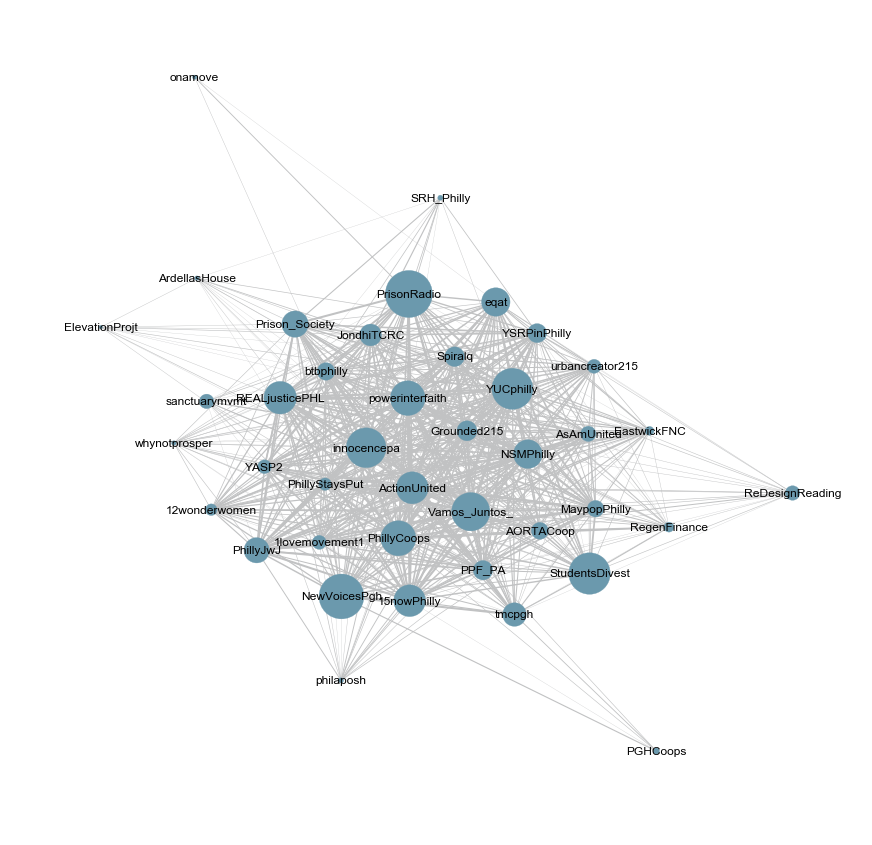

In [73]:
# Your code here
import networkx as nx
import seaborn as sns
import math

# Add nodes
G = nx.Graph()
for i in range(len(nodes)):
    G.add_node(nodes[i][0], followers=nodes[i][1])

# Add edges
for i in range(len(edges_cleaned)):
    G.add_edge(edges_cleaned[i][0], edges_cleaned[i][1], common_flws=edges_cleaned[i][2])

# Get weights of nodes (followers)  
weights=nx.get_node_attributes(G,'followers')
weights_list=list(weights.values())

# Get widths of edges (common_flws)
width=nx.get_edge_attributes(G,'common_flws')
width_list=list(width.values())


# Draw the network graph
plt.figure(figsize=(15,15));
pos=nx.spring_layout(G, k=0.3) #spring_layout, circular_layout, fruchterman_reingold_layout, spectral_layout

## Mathematical transformation of weights and width values
for i in range(len(weights_list)):
    weights_list[i] = weights_list[i]/2
    
for i in range(len(width_list)):
    width_list[i] = math.log(width_list[i], 15)
    
nx.draw_networkx_nodes(G, pos, node_size=weights_list, node_color="#6B99AD")
nx.draw_networkx_edges(G, pos, width=width_list, edge_color='#C1C2C3')
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

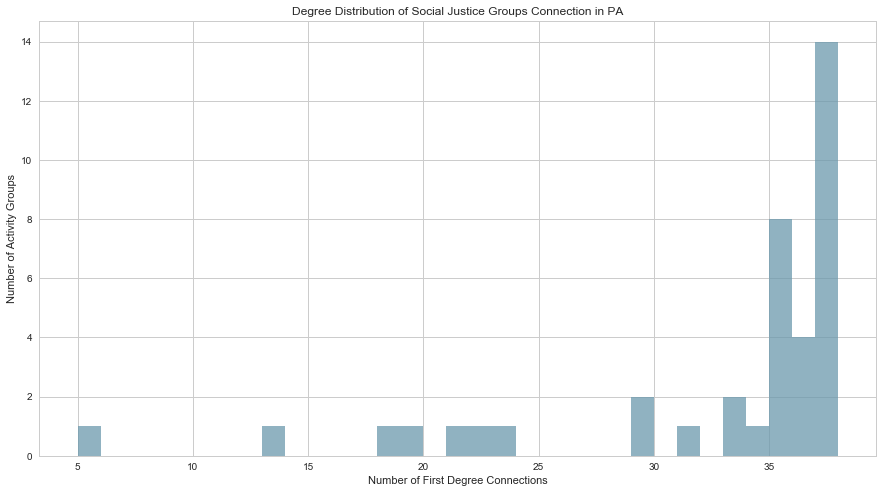

In [88]:
# Get degrees and plot histogram
degrees = nx.degree(G)
degrees_list = list(degrees.values())
degrees_bins = list(range(min(degrees_list),max(degrees_list), 1))

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.hist(degrees_list,bins=degrees_bins, facecolor='#6B99AD', alpha=0.75)
plt.xlabel('Number of First Degree Connections')
plt.ylabel('Number of Activity Groups')
plt.title('Degree Distribution of Social Justice Groups Connection in PA')
plt.show()